In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, average_precision_score

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml1920/dataset/"

def get_file(filename,local):
    if local:
        return filepath+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [21]:
# legge i dati in dataframe pandas
data = pd.read_csv(get_file("ex2data1.txt", False), header=None, names=['x1','x2','t'])

# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t']).reshape(-1,1)

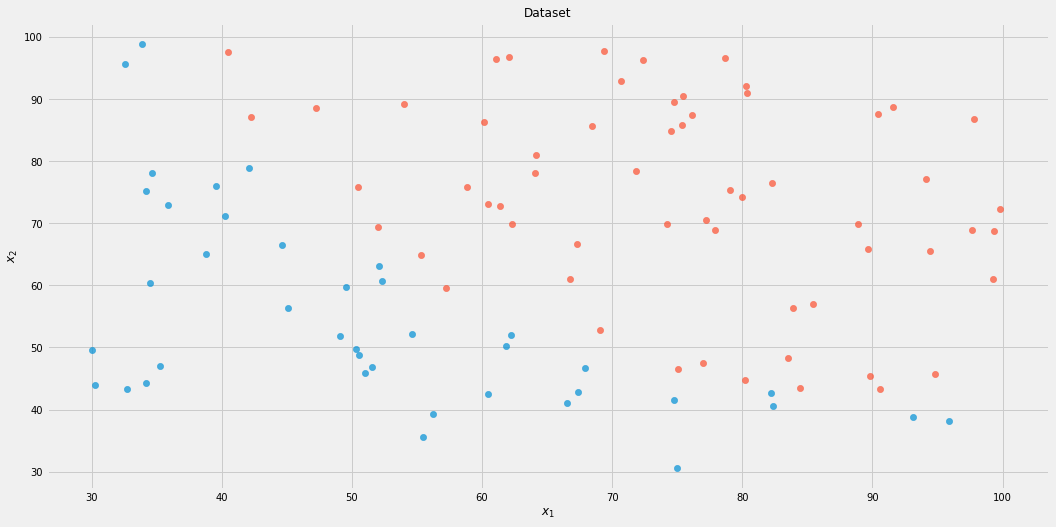

In [23]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, color=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40, color=colors[1], alpha=.7)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

In [24]:
clf = LogisticRegression(random_state=0).fit(X, t)
y = clf.predict(X)

In [25]:
cm = confusion_matrix(y, t)

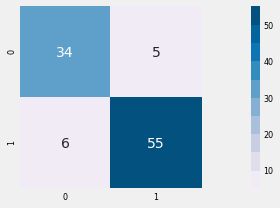

In [26]:
plt.figure(figsize=(14,3))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},
                 cmap = sns.color_palette("PuBu", 10))
plt.tight_layout()
plt.show()

In [27]:
print('{0:4d} true positives'.format(cm[1,1]))
print('{0:4d} false negatives'.format(cm[1,0]))
print('{0:4d} false positives'.format(cm[0,1]))
print('{0:4d} true negatives'.format(cm[0,0]))

  55 true positives
   6 false negatives
   5 false positives
  34 true negatives


In [28]:
print('Precision = {0:5.4f}'.format(precision_score(y,t)))
print('Recall = {0:5.4f}'.format(recall_score(y,t)))
print('F-score = {0:5.4f}'.format(f1_score(y,t)))
print('Accuracy = {0:5.4f}'.format(accuracy_score(y,t)))

Precision = 0.9167
Recall = 0.9016
F-score = 0.9091
Accuracy = 0.8900


In [29]:
fpr, tpr, thresholds = roc_curve(t, clf.predict_proba(X)[:,1], pos_label=1)

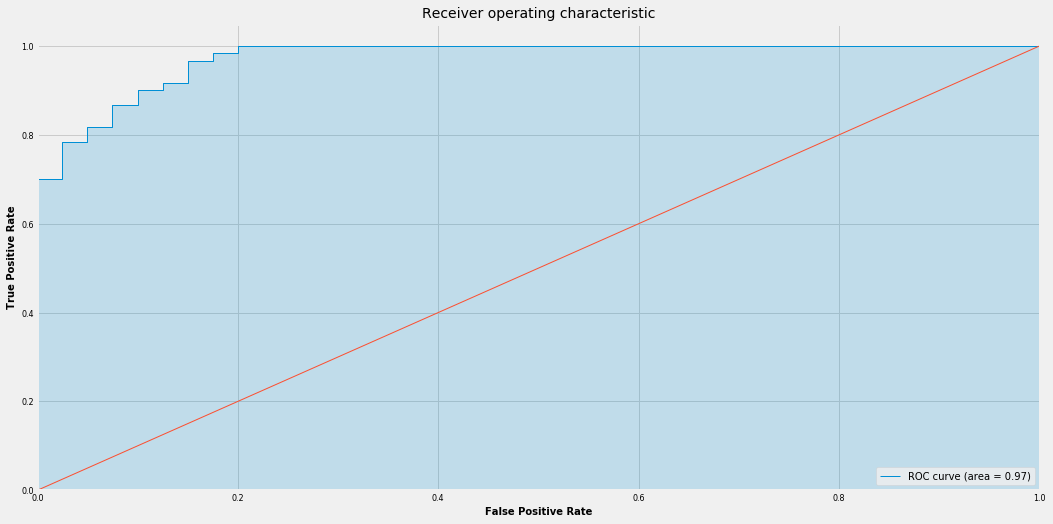

In [30]:
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color=colors[0],linewidth=1,label='ROC curve (area = %0.2f)' %  auc(fpr, tpr))
plt.fill_between(fpr, 0, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color=colors[1], linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [31]:
precision, recall, thresholds = precision_recall_curve(t, y)
average_precision = average_precision_score(y, t)

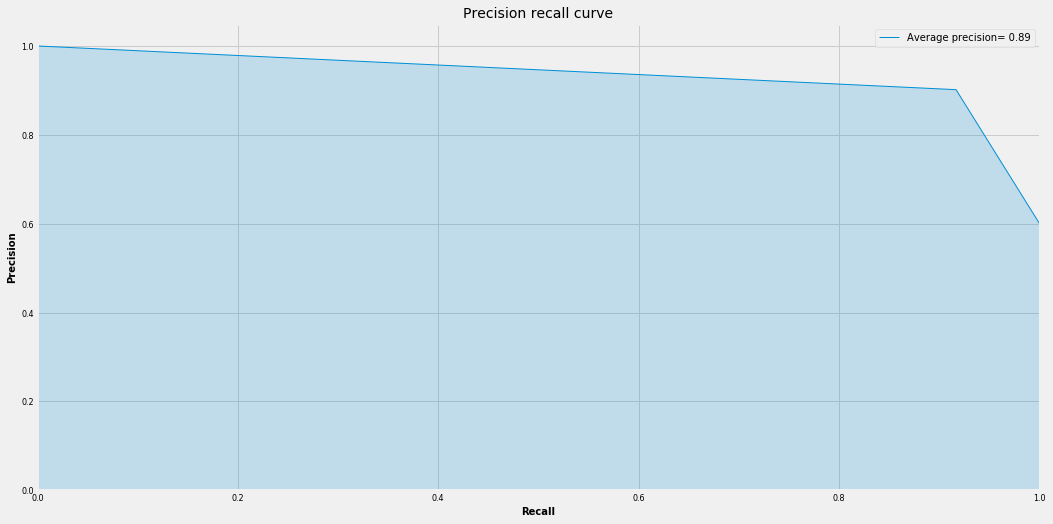

In [32]:
plt.figure(figsize=(16,8))
plt.plot(recall, precision, color=colors[0], linewidth=1, label='Average precision={0:5.2f}'.format(average_precision))
plt.fill_between(recall, 0, precision, alpha=0.2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'Precision')
plt.xlabel(r'Recall')
plt.title('Precision recall curve', fontsize=14)
plt.legend()
plt.show()